In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
os.chdir("../../air2waterpy/")

In [2]:
from air2waterpy.air2water import air2water

In [3]:
model = air2water(version = "8p")

In [4]:
model.params

array([(0.35805639, 0.20427708, 0.20212541, 21.64673292, 0.92871043, 0.61340094, 95.85341249, 0.30559987)],
      dtype=[('a1', '<f8'), ('a2', '<f8'), ('a3', '<f8'), ('a4', '<f8'), ('a5', '<f8'), ('a6', '<f8'), ('a7', '<f8'), ('a8', '<f8')])

In [5]:
# test api of update parameter boundary based on the depth
model.update_param_bnds(mean_depth_range=(1,10))

In [6]:
params = {"a1": 0.000284,
           "a2": 0.006668,
           "a3": 0.006719,  
            "a4": 2.888324,  
            "a5": 0.017322,  
            "a6": 0.212055,
            "a7": 148.709752,   
            "a8": 0.499891}
model.load_params(params)
model.params

array([(0.000284, 0.006668, 0.006719, 2.888324, 0.017322, 0.212055, 148.709752, 0.499891)],
      dtype=[('a1', '<f8'), ('a2', '<f8'), ('a3', '<f8'), ('a4', '<f8'), ('a5', '<f8'), ('a6', '<f8'), ('a7', '<f8'), ('a8', '<f8')])

# Load data

In [7]:
df = pd.read_csv("data/superior.csv", index_col=0, parse_dates=True)
df

,ta,tw
1994-01-01,-5.612,NaN
1994-01-02,-12.487,NaN
1994-01-03,-9.492,NaN
1994-01-04,-7.104,NaN
1994-01-05,-14.696,NaN
...,...,...
2011-12-27,0.167,3.87
2011-12-28,-9.733,3.83
2011-12-29,-2.471,3.81
2011-12-30,-0.071,3.79


In [8]:
cal_period = pd.date_range("1995-01-01", "2004-01-01")
val_period = pd.date_range("2005-01-01", "2011-12-31")

cal_df = df.loc[cal_period]
val_df = df.loc[val_period]

In [9]:
cal_tw_sim = model.simulate(cal_df.ta, cal_period)

<Axes: >

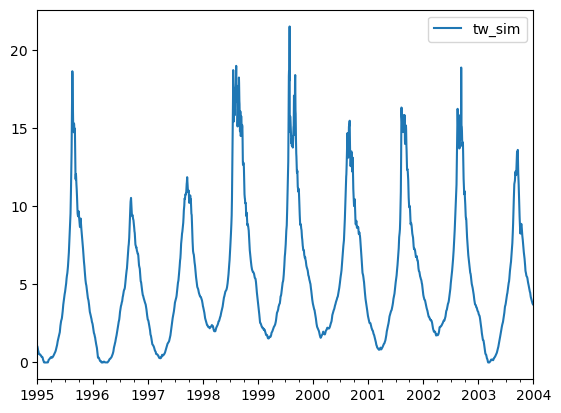

In [10]:
cal_tw_sim.plot()

# Test calibration

In [11]:
results = model.pso_fit(cal_df.tw.to_numpy(), cal_df.ta, cal_period, n_cpus=2)

2024-11-11 12:55:08,835 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████████████████████████████████|500/500, best_cost=3.96
2024-11-11 12:58:03,188 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.959450816648465, best pos: [7.91600621e-01 2.25590145e-01 4.12477859e-01 5.24198994e+01
 1.83633155e+00 7.76644191e-01 3.37371890e+01 2.11081992e-03]
